<a href="https://colab.research.google.com/github/oenereaty/MP2024/blob/main/MP2024_quiz8_%EC%8A%A4%EB%A7%88%ED%8A%B8%ED%8C%9C%ED%95%99%EA%B3%BC_%EC%B1%84%EA%B2%BD%EC%9B%90(202321639).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imports

In [2]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [99]:
import transformers
import datasets
import torch
import torchvision
#---#
import requests
from io import BytesIO
from PIL import Image

import datasets
import transformers
import torchvision.transforms
import numpy as np

# cocotiny

In [4]:
coco = datasets.load_dataset("guebin/coco-tiny")
coco

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/420 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/559k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/10 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image_id', 'coco_url', 'image', 'caption', 'recaption'],
        num_rows: 10
    })
})

In [5]:
tokenizer = transformers.AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")
tokenizer

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

DistilBertTokenizerFast(name_or_path='distilbert/distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [6]:
coco

DatasetDict({
    train: Dataset({
        features: ['image_id', 'coco_url', 'image', 'caption', 'recaption'],
        num_rows: 10
    })
})

In [31]:
def m_transform_bathched(example_batch):
    # example = l = {'text': 'i didnt feel humiliated', 'label': 0}
    result = tokenizer(example_batch['caption'], padding=True)
    return result

In [34]:
coco = coco.map(m_transform_bathched, batched=True,batch_size=10)
coco

Map:   0%|          | 0/10 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image_id', 'coco_url', 'image', 'caption', 'recaption', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
})

In [35]:
coco.column_names

{'train': ['image_id',
  'coco_url',
  'image',
  'caption',
  'recaption',
  'input_ids',
  'attention_mask']}

In [36]:
torch.tensor(coco['train']['input_ids']).shape

torch.Size([10, 22])

In [37]:
torch.tensor(coco['train']['attention_mask']).shape

torch.Size([10, 22])

In [38]:
def m_transform_bathched(example_batch):
    # example = l = {'text': 'i didnt feel humiliated', 'label': 0}
    result = tokenizer(example_batch['caption'], padding=True)
    del result['image_id',
  'coco_url',
  'image',
  'caption',
  'recaption']

    return result

In [41]:
def m_transform_bathched(example_batch):
    # example = l = {'text': 'i didnt feel humiliated', 'label': 0}
    result = tokenizer(example_batch['caption'], padding=True)
    return result

In [113]:
images = coco.select_columns(['image'])['train']

In [114]:
images[0:10]

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x453>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x612>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x427>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x338>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=L size=640x427>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=426x640>]}

In [61]:
type(images[0])

dict

In [115]:
type(images[7]['image'])

PIL.JpegImagePlugin.JpegImageFile

In [116]:
images = [image.convert("RGB") for image in images['image']]

In [117]:
images[0:10]

[<PIL.Image.Image image mode=RGB size=640x453>,
 <PIL.Image.Image image mode=RGB size=612x612>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=375x500>,
 <PIL.Image.Image image mode=RGB size=640x427>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=500x338>,
 <PIL.Image.Image image mode=RGB size=640x427>,
 <PIL.Image.Image image mode=RGB size=500x375>,
 <PIL.Image.Image image mode=RGB size=426x640>]

In [126]:
텐서화하기 = torchvision.transforms.ToTensor()

In [127]:
자르고크기조정하기 = torchvision.transforms.RandomResizedCrop((64,64))

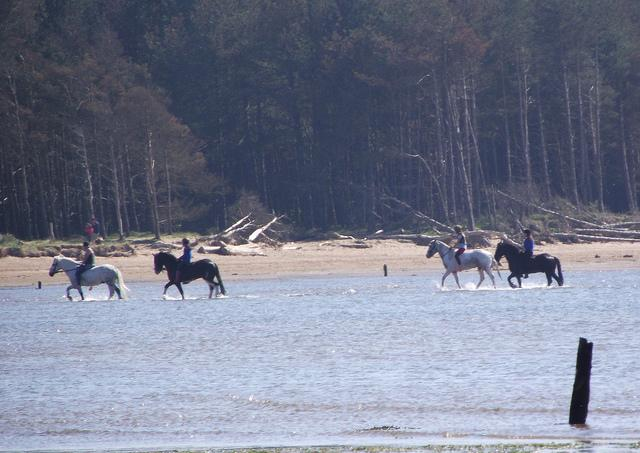

In [128]:
images[0]

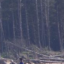

In [129]:
자르고크기조정하기(images[0])

In [144]:
images

[<PIL.Image.Image image mode=RGB size=640x453>,
 <PIL.Image.Image image mode=RGB size=612x612>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=375x500>,
 <PIL.Image.Image image mode=RGB size=640x427>,
 <PIL.Image.Image image mode=RGB size=640x480>,
 <PIL.Image.Image image mode=RGB size=500x338>,
 <PIL.Image.Image image mode=RGB size=640x427>,
 <PIL.Image.Image image mode=RGB size=500x375>,
 <PIL.Image.Image image mode=RGB size=426x640>]

In [149]:
images[0] = 자르고크기조정하기(텐서화하기(images[0]))

In [150]:
images[0]

tensor([[[0.2196, 0.2175, 0.2157,  ..., 0.2645, 0.2775, 0.2941],
         [0.2120, 0.2099, 0.2086,  ..., 0.2579, 0.2698, 0.2865],
         [0.2078, 0.2058, 0.2048,  ..., 0.2479, 0.2615, 0.2807],
         ...,
         [0.7248, 0.7219, 0.7178,  ..., 0.7266, 0.7251, 0.7206],
         [0.7188, 0.7175, 0.7140,  ..., 0.7505, 0.7463, 0.7393],
         [0.7137, 0.7137, 0.7120,  ..., 0.7795, 0.7730, 0.7647]],

        [[0.2627, 0.2607, 0.2588,  ..., 0.2871, 0.2955, 0.3059],
         [0.2577, 0.2556, 0.2537,  ..., 0.2843, 0.2904, 0.3008],
         [0.2549, 0.2528, 0.2510,  ..., 0.2775, 0.2843, 0.2964],
         ...,
         [0.7562, 0.7496, 0.7438,  ..., 0.7428, 0.7401, 0.7347],
         [0.7488, 0.7419, 0.7359,  ..., 0.7733, 0.7695, 0.7632],
         [0.7412, 0.7370, 0.7333,  ..., 0.8140, 0.8102, 0.8039]],

        [[0.3373, 0.3352, 0.3342,  ..., 0.3656, 0.3794, 0.3961],
         [0.3373, 0.3365, 0.3351,  ..., 0.3661, 0.3782, 0.3935],
         [0.3340, 0.3357, 0.3355,  ..., 0.3635, 0.3758, 0.

In [155]:
images[2] = 자르고크기조정하기(텐서화하기(images[2]))
images[3] = 자르고크기조정하기(텐서화하기(images[3]))
images[4] = 자르고크기조정하기(텐서화하기(images[4]))
images[5] = 자르고크기조정하기(텐서화하기(images[5]))
images[6] = 자르고크기조정하기(텐서화하기(images[6]))
images[7] = 자르고크기조정하기(텐서화하기(images[7]))
images[8] = 자르고크기조정하기(텐서화하기(images[8]))
images[9] = 자르고크기조정하기(텐서화하기(images[9]))

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [158]:
images[8]

tensor([[[0.1489, 0.1506, 0.1560,  ..., 0.6594, 0.6745, 0.6887],
         [0.1518, 0.1533, 0.1595,  ..., 0.6498, 0.6965, 0.6788],
         [0.1572, 0.1566, 0.1732,  ..., 0.6690, 0.6698, 0.6459],
         ...,
         [0.9092, 0.8988, 0.9254,  ..., 0.9361, 0.9313, 0.9265],
         [0.8948, 0.9134, 0.9300,  ..., 0.9333, 0.9292, 0.9225],
         [0.8969, 0.9197, 0.8957,  ..., 0.9352, 0.9306, 0.9133]],

        [[0.2470, 0.2488, 0.2579,  ..., 0.7554, 0.7758, 0.7919],
         [0.2499, 0.2515, 0.2620,  ..., 0.7480, 0.7983, 0.7798],
         [0.2553, 0.2547, 0.2689,  ..., 0.7671, 0.7706, 0.7420],
         ...,
         [0.9483, 0.9287, 0.9447,  ..., 0.9908, 0.9892, 0.9938],
         [0.9438, 0.9533, 0.9590,  ..., 0.9864, 0.9869, 0.9916],
         [0.9541, 0.9695, 0.9347,  ..., 0.9899, 0.9892, 0.9825]],

        [[0.4666, 0.4683, 0.4757,  ..., 0.9696, 0.9704, 0.9845],
         [0.4695, 0.4710, 0.4795,  ..., 0.9662, 0.9829, 0.9682],
         [0.4749, 0.4743, 0.4891,  ..., 0.9831, 0.9638, 0.

In [159]:
images

[tensor([[[0.2196, 0.2175, 0.2157,  ..., 0.2645, 0.2775, 0.2941],
          [0.2120, 0.2099, 0.2086,  ..., 0.2579, 0.2698, 0.2865],
          [0.2078, 0.2058, 0.2048,  ..., 0.2479, 0.2615, 0.2807],
          ...,
          [0.7248, 0.7219, 0.7178,  ..., 0.7266, 0.7251, 0.7206],
          [0.7188, 0.7175, 0.7140,  ..., 0.7505, 0.7463, 0.7393],
          [0.7137, 0.7137, 0.7120,  ..., 0.7795, 0.7730, 0.7647]],
 
         [[0.2627, 0.2607, 0.2588,  ..., 0.2871, 0.2955, 0.3059],
          [0.2577, 0.2556, 0.2537,  ..., 0.2843, 0.2904, 0.3008],
          [0.2549, 0.2528, 0.2510,  ..., 0.2775, 0.2843, 0.2964],
          ...,
          [0.7562, 0.7496, 0.7438,  ..., 0.7428, 0.7401, 0.7347],
          [0.7488, 0.7419, 0.7359,  ..., 0.7733, 0.7695, 0.7632],
          [0.7412, 0.7370, 0.7333,  ..., 0.8140, 0.8102, 0.8039]],
 
         [[0.3373, 0.3352, 0.3342,  ..., 0.3656, 0.3794, 0.3961],
          [0.3373, 0.3365, 0.3351,  ..., 0.3661, 0.3782, 0.3935],
          [0.3340, 0.3357, 0.3355,  ...,

In [160]:
coco

DatasetDict({
    train: Dataset({
        features: ['image_id', 'coco_url', 'image', 'caption', 'recaption', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
})

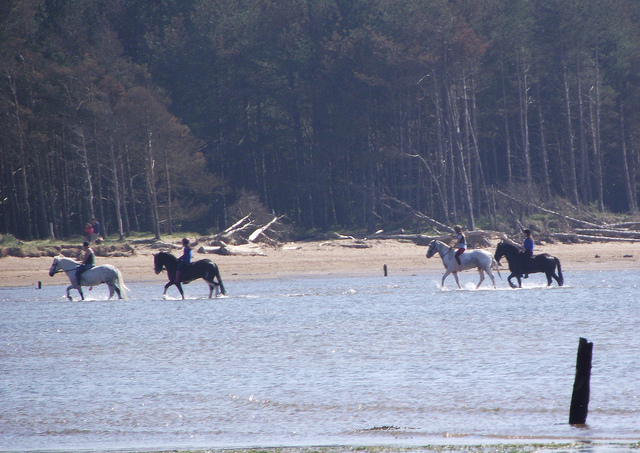

In [163]:
from PIL import Image
import requests
from io import BytesIO

# 이미지 URL
url = "http://images.cocodataset.org/val2014/COCO_val2014_000000053120.jpg"

# URL에서 이미지 불러오기
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [164]:
img = 자르고크기조정하기(텐서화하기(img))

In [165]:
img

tensor([[[0.2908, 0.2670, 0.2800,  ..., 0.2479, 0.2475, 0.2315],
         [0.2975, 0.2818, 0.2831,  ..., 0.2430, 0.2441, 0.2371],
         [0.2801, 0.2745, 0.2747,  ..., 0.2605, 0.2584, 0.2384],
         ...,
         [0.6986, 0.8216, 0.9322,  ..., 0.8248, 0.8124, 0.8136],
         [0.4482, 0.5194, 0.6617,  ..., 0.7817, 0.7808, 0.7654],
         [0.4008, 0.4096, 0.4345,  ..., 0.7317, 0.7433, 0.7568]],

        [[0.3050, 0.2874, 0.3078,  ..., 0.2803, 0.2818, 0.2670],
         [0.3121, 0.2965, 0.3045,  ..., 0.2742, 0.2730, 0.2638],
         [0.2916, 0.2870, 0.2973,  ..., 0.2820, 0.2863, 0.2645],
         ...,
         [0.7071, 0.8130, 0.9166,  ..., 0.7529, 0.7407, 0.7418],
         [0.4673, 0.5364, 0.6702,  ..., 0.7051, 0.7033, 0.7021],
         [0.4326, 0.4441, 0.4738,  ..., 0.6500, 0.6693, 0.7016]],

        [[0.3795, 0.3735, 0.3790,  ..., 0.3695, 0.3702, 0.3494],
         [0.3838, 0.3760, 0.3795,  ..., 0.3683, 0.3612, 0.3475],
         [0.3760, 0.3779, 0.3740,  ..., 0.3623, 0.3614, 0.

In [170]:
coco

DatasetDict({
    train: Dataset({
        features: ['image_id', 'coco_url', 'image', 'caption', 'recaption', 'input_ids', 'attention_mask'],
        num_rows: 10
    })
})